# Forecasting

### Objective 

To forecast stock price using historical data by applying Prophet method.

### Prophet Method 

In [1]:
# Sample data : historical apple stock price
import pandas as pd
forecast = pd.read_csv('AAPL.csv')

In [2]:
# First five raws
forecast.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1985-01-01,0.130022,0.138951,0.124442,0.129464,0.100314,6366416000
1,1985-02-01,0.129464,0.137277,0.110491,0.110491,0.085613,4733388800
2,1985-03-01,0.110491,0.116071,0.092634,0.098772,0.076533,4615587200
3,1985-04-01,0.098772,0.102679,0.087612,0.094866,0.073506,2868028800
4,1985-05-01,0.094866,0.099330,0.075335,0.077567,0.060102,4639129600


In [3]:
#selecting a specific rows for time series analysis
forecast = forecast[['Date','Close']]

In [4]:
#renaming the colums for analysis purpose
forecast=forecast.rename(columns={'Date':'ds' ,'Close':'y'})
forecast

,ds,y
0,1985-01-01,0.129464
1,1985-02-01,0.110491
2,1985-03-01,0.098772
3,1985-04-01,0.094866
4,1985-05-01,0.077567
...,...,...
460,2023-05-01,177.250000
461,2023-06-01,193.970001
462,2023-07-01,196.449997
463,2023-08-01,187.869995


In [5]:
#Data Type
forecast.dtypes

ds     object
y     float64
dtype: object

In [6]:
# the oldest Date of the record
forecast.ds.min()

'1985-01-01'

In [7]:
# the latest Date of the record
forecast.ds.max()

'2023-09-01'

Text(0.5, 0, 'Date')

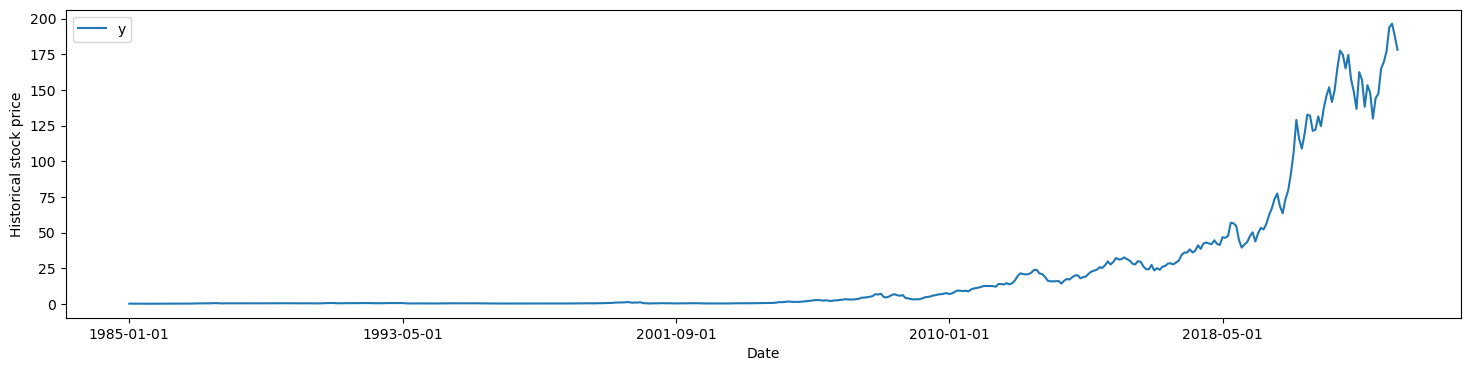

In [8]:
# Showing Trend
from matplotlib import pyplot
ax = forecast.set_index('ds').plot(figsize=(18, 4))
ax.set_ylabel('Historical stock price')
ax.set_xlabel('Date')

In [9]:
# Prophet Model 
from prophet import Prophet
my_model = Prophet(interval_width=0.95)
my_model.fit(forecast)

21:50:02 - cmdstanpy - INFO - Chain [1] start processing
21:50:02 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
# Forecasting 5 periods 
future_dates = my_model.make_future_dataframe(periods=5, freq='MS')
future_dates

,ds
0,1985-01-01
1,1985-02-01
2,1985-03-01
3,1985-04-01
4,1985-05-01
...,...
465,2023-10-01
466,2023-11-01
467,2023-12-01
468,2024-01-01


In [11]:
# Predicting the future price 
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat',  'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
465,2023-10-01,168.711774,148.989734,187.483562
466,2023-11-01,170.026765,153.582093,189.119970
467,2023-12-01,170.362152,152.210500,188.831546
468,2024-01-01,172.103775,154.008211,191.552918
469,2024-02-01,172.765958,154.840970,190.489830


Text(0.5, 1.0, 'Historical and forecasted Stock Price')

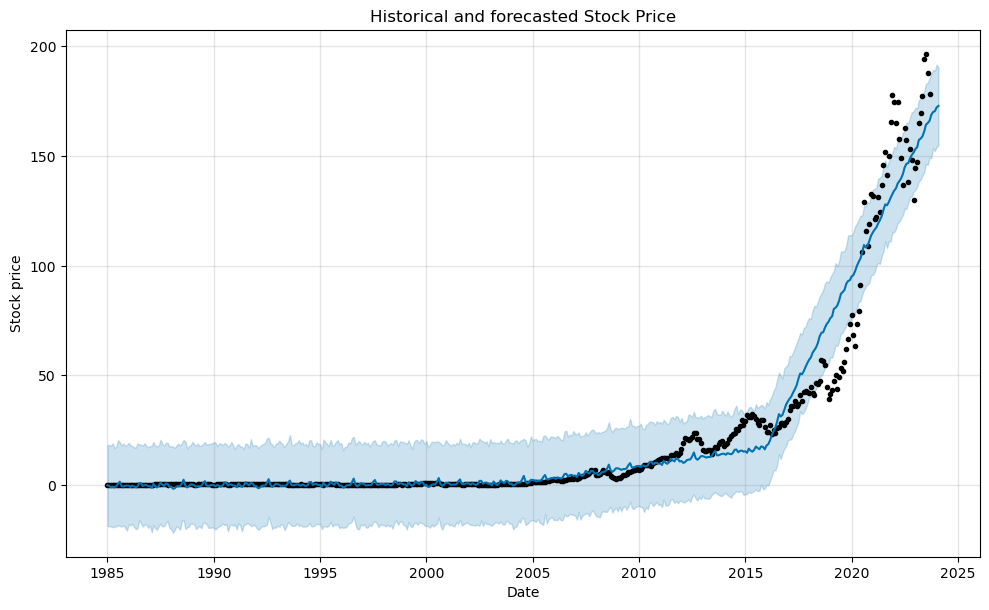

In [12]:
# Showing the actual and forecasted values
import matplotlib.pyplot as plt

my_model.plot(forecast);

plt.ylabel('Stock price')
plt.xlabel('Date')
plt.title('Historical and forecasted Stock Price')

In [13]:
#Saving forecasted values
forecast.to_csv('model_forecast.csv')